In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

## Data Loading

In [3]:
fifa_url = "https://raw.githubusercontent.com/Niyetali/FIFA-Rating-Prediction/main/output"

# importing datasets
X_train = pd.read_csv(f"{fifa_url}/X_train.csv", sep=',')
X_test = pd.read_csv(f"{fifa_url}/X_test.csv", sep=',')
y_train = pd.read_csv(f"{fifa_url}/y_train.csv", sep=',')
y_test = pd.read_csv(f"{fifa_url}/y_test.csv", sep=',')

pd.set_option('display.max_columns', None)

# Print shapes of the datasets
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(14100, 17) (3525, 17)
(14100, 1) (3525, 1)


In [4]:
X_train.head(11)

,Name,Age,Nationality,Potential,Club,Value,Wage,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Loaned From,Height,Weight,Release Clause
0,H. Stenevik,22,Norway,74,Strømsgodset IF,1100000.0,1000.0,1.0,3.0,4.0,Medium/ High,Lean,RW,Permanent,185,70,1600000.0
1,22 T. Wooster,16,England,73,Manchester United,230000.0,500.0,1.0,3.0,1.0,Medium/ Medium,Lean,RES,Permanent,195,85,656000.0
2,14 J. Rothen,35,France,71,Stade Malherbe Caen,325000.0,15000.0,2.0,2.0,3.0,Medium/ Medium,Normal,SUB,Permanent,177,74,0.0
3,22 D. Noboa,26,Ecuador,70,Guayaquil City FC,1100000.0,500.0,1.0,3.0,2.0,Medium/ High,Normal,LDM,Permanent,183,79,2400000.0
4,22 Baek Seung Woo,22,Korea Republic,62,Jeju United FC,180000.0,1000.0,1.0,3.0,2.0,Medium/ Medium,Normal,SUB,Permanent,170,65,261000.0
5,22 Pipa,23,Spain,78,Huddersfield Town,3600000.0,6000.0,1.0,4.0,3.0,Medium/ Medium,Normal,SUB,Permanent,176,72,7600000.0
6,22 Park Seong Hun,18,Korea Republic,66,FC Seoul,110000.0,500.0,1.0,4.0,2.0,Medium/ High,Normal,RES,Permanent,183,72,206000.0
7,E. Hellman,21,Sweden,71,Helsingborgs IF,525000.0,500.0,1.0,3.0,2.0,Medium/ Medium,Normal,RB,Permanent,183,79,761000.0
8,C. Kaymaz,24,Germany,63,SpVgg Bayreuth,275000.0,500.0,1.0,4.0,2.0,Medium/ Medium,Normal,RES,Permanent,187,80,454000.0
9,Joan González,20,Spain,70,Lecce,500000.0,2000.0,1.0,3.0,3.0,High/ High,Normal,RES,Permanent,190,82,1000000.0


For the models we will use, we need to convert the categorical data into numerical format.

# Feature Engineering

## Binary Encoding:

In [8]:
X_train['Loaned From'].unique()

array(['Permanent', '<a href="/team/9/liverpool/">Liverpool</a>',
       '<a href="/team/1876/river-plate/">River Plate</a>',
       '<a href="/team/280/olympiacos-cfp/">Olympiacos CFP</a>',
       '<a href="/team/11/manchester-united/">Manchester United</a>',
       '<a href="/team/110065/cf-fuenlabrada/">CF Fuenlabrada</a>',
       '<a href="/team/17/southampton/">Southampton</a>',
       '<a href="/team/1853/levante-union-deportiva/">Levante Unión Deportiva</a>',
       '<a href="/team/159/dsc-arminia-bielefeld/">DSC Arminia Bielefeld</a>',
       '<a href="/team/110396/newells-old-boys/">Newell\'s Old Boys</a>',
       '<a href="/team/101037/caykur-rizespor/">Çaykur Rizespor</a>',
       '<a href="/team/110890/crawley-town/">Crawley Town</a>',
       '<a href="/team/31/1-fc-koln/">1. FC Köln</a>',
       '<a href="/team/39/atalanta/">Atalanta</a>',
       '<a href="/team/1795/watford/">Watford</a>',
       '<a href="/team/110150/gallos-blancos-de-queretaro/">Gallos Blancos de Queré

The "Loaned From" column indicates whether a player is on loan (club name) or not ("Permanent"). We'll simplify this by applying binary encoding: `1` for players on loan and `0` for those not on loan. This transformation makes the data cleaner and easier to use for the models.

In [10]:
# Transform "Loaned From" into binary "On_loan"
X_train['On_loan'] = (X_train['Loaned From'] != 'Permanent').astype(int)
X_test['On_loan'] = (X_test['Loaned From'] != 'Permanent').astype(int)

# Drop the original "Loaned From" column
X_train = X_train.drop(columns=['Loaned From'])
X_test = X_test.drop(columns=['Loaned From'])

# Display the first few rows of X_train
X_train.head()

,Name,Age,Nationality,Potential,Club,Value,Wage,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,Release Clause,On_loan
0,H. Stenevik,22,Norway,74,Strømsgodset IF,1100000.0,1000.0,1.0,3.0,4.0,Medium/ High,Lean,RW,185,70,1600000.0,0
1,22 T. Wooster,16,England,73,Manchester United,230000.0,500.0,1.0,3.0,1.0,Medium/ Medium,Lean,RES,195,85,656000.0,0
2,14 J. Rothen,35,France,71,Stade Malherbe Caen,325000.0,15000.0,2.0,2.0,3.0,Medium/ Medium,Normal,SUB,177,74,0.0,0
3,22 D. Noboa,26,Ecuador,70,Guayaquil City FC,1100000.0,500.0,1.0,3.0,2.0,Medium/ High,Normal,LDM,183,79,2400000.0,0
4,22 Baek Seung Woo,22,Korea Republic,62,Jeju United FC,180000.0,1000.0,1.0,3.0,2.0,Medium/ Medium,Normal,SUB,170,65,261000.0,0


In [11]:
X_train['On_loan'].unique()

array([0, 1])

In [12]:
X_test['On_loan'].unique()

array([0, 1])

## Label Encoding:

### `Body Type`

In [15]:
X_train['Body Type'].value_counts()

Body Type
Normal    8302
Lean      5075
Stocky     620
Unique     103
Name: count, dtype: int64

In [16]:
# Create a label (category) encoder object
le = LabelEncoder()

# Creating a dictionary to store LabelEncoder objects
le = {}

# Initialize LabelEncoder
le['Body_Type'] = LabelEncoder()

# Fit and transform 'Body Type'
X_train['Body_Type'] = le['Body_Type'].fit_transform(X_train['Body Type'])
X_test['Body_Type'] = le['Body_Type'].transform(X_test['Body Type'])

# Drop the original 'Body Type' column
X_train = X_train.drop(columns=['Body Type'])
X_test = X_test.drop(columns=['Body Type'])

# Print encoding and decoding for 'Body Type'
encoded_values = range(len(le['Body_Type'].classes_))
decoded_values = le['Body_Type'].classes_

for enc, dec in zip(encoded_values, decoded_values):
    print(f"{enc} -> {dec}")

0 -> Lean
1 -> Normal
2 -> Stocky
3 -> Unique


### `Work Rate`

In [19]:
X_train['Work Rate'].value_counts()

Work Rate
Medium/ Medium    8056
High/ Medium      2423
Medium/ High      1125
High/ High         661
Medium/ Low        610
High/ Low          560
Low/ Medium        285
Low/ High          272
Low/ Low            63
N/A/ N/A            45
Name: count, dtype: int64

The `Work Rate` column will be split into two new features: `Attacking_Work_Rate`, which represent the player's effort in attack, and `Defensive_Work_Rate`, which represents their effort in defense. This transformation simplifies the analysis of a player's style and contributions. Once these features are created, label encoding is applied to prepare them for use in the model.

#### Before proceeding, we'll replace any occurrences of `NA / NA` in the `Work Rate` column with the mode of the column. Since it is small compared to the total, this is an effective solution:

In [22]:
mode = X_train['Work Rate'].mode()[0]

X_train['Work Rate'] = X_train['Work Rate'].replace('N/A/ N/A', mode)
X_test['Work Rate'] = X_test['Work Rate'].replace('N/A/ N/A', mode)

X_train['Work Rate'].value_counts()

Work Rate
Medium/ Medium    8101
High/ Medium      2423
Medium/ High      1125
High/ High         661
Medium/ Low        610
High/ Low          560
Low/ Medium        285
Low/ High          272
Low/ Low            63
Name: count, dtype: int64

#### Lets first split the `Work Rate` column into `Attacking_Work_Rate` and `Defensive_Work_Rate`:

In [24]:
X_train[['Attacking_Work_Rate', 'Defensive_Work_Rate']] = X_train['Work Rate'].str.split('/', expand=True)
X_test[['Attacking_Work_Rate', 'Defensive_Work_Rate']] = X_test['Work Rate'].str.split('/', expand=True)

# And remove any extra spaces
X_train['Attacking_Work_Rate'] = X_train['Attacking_Work_Rate'].str.strip()
X_train['Defensive_Work_Rate'] = X_train['Defensive_Work_Rate'].str.strip()
X_test['Attacking_Work_Rate'] = X_test['Attacking_Work_Rate'].str.strip()
X_test['Defensive_Work_Rate'] = X_test['Defensive_Work_Rate'].str.strip()

#### And apply Label Encoder:

In [26]:
# Create a label (category) encoder object
le = LabelEncoder()

# Fit and transform 'Attacking_Work_Rate'
X_train['Attacking_Work_Rate'] = le.fit_transform(X_train['Attacking_Work_Rate'])
X_test['Attacking_Work_Rate'] = le.transform(X_test['Attacking_Work_Rate'])

# Create mapping for 'Attacking_Work_Rate'
attacking_work_rate_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Fit and transform 'Defensive_Work_Rate'
X_train['Defensive_Work_Rate'] = le.fit_transform(X_train['Defensive_Work_Rate'])
X_test['Defensive_Work_Rate'] = le.transform(X_test['Defensive_Work_Rate'])

# Create mapping for 'Defensive_Work_Rate'
defensive_work_rate_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Drop the original 'Work Rate' column
X_train = X_train.drop(columns=['Work Rate'])
X_test = X_test.drop(columns=['Work Rate'])

# Print mappings
print("Attacking Work Rate Mapping:", attacking_work_rate_mapping)
print("Defensive Work Rate Mapping:", defensive_work_rate_mapping)

Attacking Work Rate Mapping: {'High': 0, 'Low': 1, 'Medium': 2}
Defensive Work Rate Mapping: {'High': 0, 'Low': 1, 'Medium': 2}


#### Looks good!!

## One-Hot Encoding

### `Position`

In [30]:
X_train['Position'].unique()

array(['RW', 'RES', 'SUB', 'LDM', 'RB', 'LCB', 'RWB', 'LCM', 'RM', 'CAM',
       'GK', 'RCB', 'LS', 'ST', 'LM', 'LB', 'RS', 'RDM', 'CB', 'LW',
       'RCM', 'CDM', 'LWB', 'LAM', 'RAM', 'LF', 'CM', 'RF', 'CF'],
      dtype=object)

In [31]:
# One-hot encoding for the 'Position' column
X_train = pd.get_dummies(X_train, columns=['Position'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Position'], drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Ensure binary values for the one-hot encoded columns are integers
for col in X_train.filter(like='Position_').columns:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

# Rename columns to remove the 'Position_' prefix
X_train.rename(columns=lambda x: x.replace('Position_', ''), inplace=True)
X_test.rename(columns=lambda x: x.replace('Position_', ''), inplace=True)

print(X_train.head(11))

                 Name  Age     Nationality  Potential  \
0         H. Stenevik   22          Norway         74   
1       22 T. Wooster   16         England         73   
2        14 J. Rothen   35          France         71   
3         22 D. Noboa   26         Ecuador         70   
4   22 Baek Seung Woo   22  Korea Republic         62   
5             22 Pipa   23           Spain         78   
6   22 Park Seong Hun   18  Korea Republic         66   
7          E. Hellman   21          Sweden         71   
8           C. Kaymaz   24         Germany         63   
9       Joan González   20           Spain         70   
10       Álex Padilla   18           Spain         80   

                       Club      Value     Wage  International Reputation  \
0           Strømsgodset IF  1100000.0   1000.0                       1.0   
1         Manchester United   230000.0    500.0                       1.0   
2       Stade Malherbe Caen   325000.0  15000.0                       2.0   
3      

## Target Encoding

### `Nationality` & `Club`

During the EDA, we observed that the `Nationality` and `Club` columns have many unique values. However, these columns might contain relevant information that impacts the target variable, which is the `Overall` rating. To capture this relationship, we'll apply target encoding and replace these categorical values with the mean value of the target for each category.

In [35]:
# Create a target (category) encoder object
te = TargetEncoder(cols=['Nationality', 'Club'])

# Fit and transform 'Nationality' and 'Club' columns
X_train[['Nationality', 'Club']] = te.fit_transform(X_train[['Nationality', 'Club']], y_train)
X_test[['Nationality', 'Club']] = te.transform(X_test[['Nationality', 'Club']])

# Check the transformed columns in X_train
print(X_train[['Nationality', 'Club']].head(11))

    Nationality       Club
0     60.146444  61.582005
1     61.014790  69.208020
2     66.254815  61.872308
3     63.190972  63.101327
4     55.459091  59.455049
5     67.335451  62.733060
6     55.459091  60.041320
7     59.946154  62.105563
8     63.356295  61.491901
9     67.335451  64.358177
10    67.335451  68.755739


## Reviewing the Data

In [37]:
X_train.head()

,Name,Age,Nationality,Potential,Club,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,Release Clause,On_loan,Body_Type,Attacking_Work_Rate,Defensive_Work_Rate,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RES,RF,RM,RS,RW,RWB,ST,SUB
0,H. Stenevik,22,60.146444,74,61.582005,1100000.0,1000.0,1.0,3.0,4.0,185,70,1600000.0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,22 T. Wooster,16,61.014790,73,69.208020,230000.0,500.0,1.0,3.0,1.0,195,85,656000.0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,14 J. Rothen,35,66.254815,71,61.872308,325000.0,15000.0,2.0,2.0,3.0,177,74,0.0,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,22 D. Noboa,26,63.190972,70,63.101327,1100000.0,500.0,1.0,3.0,2.0,183,79,2400000.0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,22 Baek Seung Woo,22,55.459091,62,59.455049,180000.0,1000.0,1.0,3.0,2.0,170,65,261000.0,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14100 entries, 0 to 14099
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      14100 non-null  object 
 1   Age                       14100 non-null  int64  
 2   Nationality               14100 non-null  float64
 3   Potential                 14100 non-null  int64  
 4   Club                      14100 non-null  float64
 5   Value                     14100 non-null  float64
 6   Wage                      14100 non-null  float64
 7   International Reputation  14100 non-null  float64
 8   Weak Foot                 14100 non-null  float64
 9   Skill Moves               14100 non-null  float64
 10  Height                    14100 non-null  int64  
 11  Weight                    14100 non-null  int64  
 12  Release Clause            14100 non-null  float64
 13  On_loan                   14100 non-null  int64  
 14  Body_T

#### And for test:

In [49]:
X_test.head()

,Name,Age,Nationality,Potential,Club,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,Release Clause,On_loan,Body_Type,Attacking_Work_Rate,Defensive_Work_Rate,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RES,RF,RM,RS,RW,RWB,ST,SUB
0,22 R. Alba,18,62.066327,70,62.153457,375000.0,1000.0,1.0,3.0,2.0,182,70,872000.0,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Lee Ho Jae,21,55.459091,61,58.998638,210000.0,1000.0,1.0,3.0,2.0,192,84,305000.0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,F. Mendy,27,66.254815,84,72.862340,38000000.0,170000.0,1.0,5.0,4.0,180,73,80800000.0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22 J. Eichhorn,19,63.356295,73,64.154863,500000.0,2000.0,1.0,3.0,2.0,165,66,1100000.0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Luis Milla,27,67.335451,81,64.919785,19000000.0,30000.0,1.0,3.0,3.0,175,67,41300000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      3525 non-null   object 
 1   Age                       3525 non-null   int64  
 2   Nationality               3525 non-null   float64
 3   Potential                 3525 non-null   int64  
 4   Club                      3525 non-null   float64
 5   Value                     3525 non-null   float64
 6   Wage                      3525 non-null   float64
 7   International Reputation  3525 non-null   float64
 8   Weak Foot                 3525 non-null   float64
 9   Skill Moves               3525 non-null   float64
 10  Height                    3525 non-null   int64  
 11  Weight                    3525 non-null   int64  
 12  Release Clause            3525 non-null   float64
 13  On_loan                   3525 non-null   int64  
 14  Body_Typ

## Additional Features:

Now, let’s create new features using the ones we already have. This helps us discover new patterns and make our analysis even better!

### Additional Financial Features:

In [64]:
# Shows how much a player is worth relative to their wage.
X_train['Value_to_Wage_Ratio'] = X_train['Value'] / X_train['Wage']
X_test['Value_to_Wage_Ratio'] = X_test['Value'] / X_test['Wage']

# Measures potential market gain/loss by comparing release clause to market value.
X_train['Surplus_Value'] = X_train['Release Clause'] - X_train['Value']
X_test['Surplus_Value'] = X_test['Release Clause'] - X_test['Value']

print(X_train[['Value_to_Wage_Ratio', 'Surplus_Value']].head(11))

    Value_to_Wage_Ratio  Surplus_Value
0           1100.000000       500000.0
1            460.000000       426000.0
2             21.666667      -325000.0
3           2200.000000      1300000.0
4            180.000000        81000.0
5            600.000000      4000000.0
6            220.000000        96000.0
7           1050.000000       236000.0
8            550.000000       179000.0
9            250.000000       500000.0
10          1800.000000      1600000.0


### Additional Physical Features:

In [67]:
## BMI and Physical
#  BMI: Calculates a player's body mass index.  
#  Physical: Approximates physical dominance using height and weight averages.

# BMI
X_train['BMI'] = X_train['Weight'] / (X_train['Height'] / 100) ** 2
X_test['BMI'] = X_test['Weight'] / (X_test['Height'] / 100) ** 2

# Physical
X_train['Physical'] = (X_train['Height'] + X_train['Weight']) / 2
X_test['Physical'] = (X_test['Height'] + X_test['Weight']) / 2

print(X_train[['BMI', 'Physical']].head(10))

         BMI  Physical
0  20.452885     127.5
1  22.353715     140.0
2  23.620288     125.5
3  23.589835     131.0
4  22.491349     117.5
5  23.243802     124.0
6  21.499597     127.5
7  23.589835     131.0
8  22.877406     133.5
9  22.714681     136.0


### Additional Age-Related Features:

We'll create an `Age_Bucket` feature that groups players into age categories: `Young`, `Prime`, and `Veteran`. After defining these categories, we'll convert them into numerical values using label encoding.

In [71]:
# Define the age_bucket function
def age_bucket(age):
    
    if age <= 21:         # below or equal to 21y
        return 'Young'
    elif 22 <= age <= 30: # between 22y and 30y
        return 'Prime'
    else:                 # above 30y
        return 'Veteran'

# Fit and transform 'Age_Group'
X_train['Age_Group'] = X_train['Age'].apply(age_bucket)
X_test['Age_Group'] = X_test['Age'].apply(age_bucket)

# Create a label (category) encoder object
le = LabelEncoder()

# Fit and transform 'Age_Group' column
X_train['Age_Group'] = le.fit_transform(X_train['Age_Group'])
X_test['Age_Group'] = le.transform(X_test['Age_Group'])

# Create mapping for 'Age_Group'
age_group_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print(age_group_mapping)

{'Prime': 0, 'Veteran': 1, 'Young': 2}


### Potential Related Features

In [74]:
X_train['Value_to_Potential'] = X_train['Value'] / X_train['Potential']
X_test['Value_to_Potential'] = X_test['Value'] / X_test['Potential']

X_train['Potential_Age_Ratio'] = X_train['Potential'] / X_train['Age']
X_test['Potential_Age_Ratio'] = X_test['Potential'] / X_test['Age']

print(X_train[['Value_to_Potential', 'Potential_Age_Ratio']].head(10))

   Value_to_Potential  Potential_Age_Ratio
0        14864.864865             3.363636
1         3150.684932             4.562500
2         4577.464789             2.028571
3        15714.285714             2.692308
4         2903.225806             2.818182
5        46153.846154             3.391304
6         1666.666667             3.666667
7         7394.366197             3.380952
8         4365.079365             2.625000
9         7142.857143             3.500000


### Reviewing the Data

In [77]:
X_train

,Name,Age,Nationality,Potential,Club,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,Release Clause,On_loan,Body_Type,Attacking_Work_Rate,Defensive_Work_Rate,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RES,RF,RM,RS,RW,RWB,ST,SUB,Value_to_Wage_Ratio,Surplus_Value,BMI,Physical,Age_Group,Value_to_Potential,Potential_Age_Ratio
0,H. Stenevik,22,60.146444,74,61.582005,1100000.0,1000.0,1.0,3.0,4.0,185,70,1600000.0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1100.000000,500000.0,20.452885,127.5,0,14864.864865,3.363636
1,22 T. Wooster,16,61.014790,73,69.208020,230000.0,500.0,1.0,3.0,1.0,195,85,656000.0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,460.000000,426000.0,22.353715,140.0,2,3150.684932,4.562500
2,14 J. Rothen,35,66.254815,71,61.872308,325000.0,15000.0,2.0,2.0,3.0,177,74,0.0,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21.666667,-325000.0,23.620288,125.5,1,4577.464789,2.028571
3,22 D. Noboa,26,63.190972,70,63.101327,1100000.0,500.0,1.0,3.0,2.0,183,79,2400000.0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2200.000000,1300000.0,23.589835,131.0,0,15714.285714,2.692308
4,22 Baek Seung Woo,22,55.459091,62,59.455049,180000.0,1000.0,1.0,3.0,2.0,170,65,261000.0,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,180.000000,81000.0,22.491349,117.5,0,2903.225806,2.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14095,E. Danso,21,66.087892,68,61.582005,350000.0,650.0,1.0,4.0,3.0,170,63,508000.0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,538.461538,158000.0,21.799308,116.5,2,5147.058824,3.238095
14096,D. Osio,25,62.463768,71,61.985703,1000000.0,500.0,1.0,2.0,2.0,191,80,2400000.0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2000.000000,1400000.0,21.929223,135.5,0,14084.507042,2.840000
14097,T. Tessmann,20,60.604982,80,65.558126,1900000.0,1000.0,1.0,5.0,2.0,188,86,4200000.0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1900.000000,2300000.0,24.332277,137.0,2,23750.000000,4.000000
14098,N. Amiri,25,63.356295,79,69.762496,10000000.0,42000.0,2.0,3.0,4.0,180,77,17800000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,238.095238,7800000.0,23.765432,128.5,0,126582.278481,3.160000


In [79]:
X_test

,Name,Age,Nationality,Potential,Club,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,Release Clause,On_loan,Body_Type,Attacking_Work_Rate,Defensive_Work_Rate,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RES,RF,RM,RS,RW,RWB,ST,SUB,Value_to_Wage_Ratio,Surplus_Value,BMI,Physical,Age_Group,Value_to_Potential,Potential_Age_Ratio
0,22 R. Alba,18,62.066327,70,62.153457,375000.0,1000.0,1.0,3.0,2.0,182,70,872000.0,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,375.000000,497000.0,21.132713,126.0,2,5357.142857,3.888889
1,Lee Ho Jae,21,55.459091,61,58.998638,210000.0,1000.0,1.0,3.0,2.0,192,84,305000.0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,210.000000,95000.0,22.786458,138.0,2,3442.622951,2.904762
2,F. Mendy,27,66.254815,84,72.862340,38000000.0,170000.0,1.0,5.0,4.0,180,73,80800000.0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,223.529412,42800000.0,22.530864,126.5,0,452380.952381,3.111111
3,22 J. Eichhorn,19,63.356295,73,64.154863,500000.0,2000.0,1.0,3.0,2.0,165,66,1100000.0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,250.000000,600000.0,24.242424,115.5,2,6849.315068,3.842105
4,Luis Milla,27,67.335451,81,64.919785,19000000.0,30000.0,1.0,3.0,3.0,175,67,41300000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,633.333333,22300000.0,21.877551,121.0,0,234567.901235,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,22 W. Sulaeman,19,62.288580,62,61.866195,130000.0,800.0,1.0,2.0,2.0,170,67,202000.0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,162.500000,72000.0,23.183391,118.5,2,2096.774194,3.263158
3521,22 W. Kłos,21,59.816794,65,59.830034,325000.0,550.0,1.0,4.0,2.0,178,71,504000.0,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,590.909091,179000.0,22.408787,124.5,2,5000.000000,3.095238
3522,L. Delap,19,61.014790,84,70.882074,2200000.0,17000.0,1.0,4.0,2.0,186,80,5400000.0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,129.411765,3200000.0,23.124061,133.0,2,26190.476190,4.421053
3523,16 D. Duff,36,57.361789,71,61.298454,130000.0,25000.0,2.0,3.0,3.0,177,75,0.0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.200000,-130000.0,23.939481,126.0,1,1830.985915,1.972222


## Feature Selection

We simplify the dataset by keeping only the most relevant features, removing noise, and improving prediction accuracy. This ensures our analysis focuses on meaningful data for better results.

In [83]:
# Columns related to Positions
exclude = [
    "ST", "GK", "RCB", "LCM", "LCB", "RCM", "LM", "LB", "RB", 
    "RM", "RW", "CDM", "CB", "LW", "RS", "LS", "LDM", "RDM", 
    "RWB", "CF", "RF", "LF", "LWB", "CM", "LAM", "RAM", "SUB", "RES"
]

# Lets drop the 'Names' column and Positions
X_train_filtered = X_train.drop(columns=[X_train.columns[0]] + exclude)

# And combine into a dataframe
data = X_train_filtered.copy()
data['Target'] = y_train

data.head(11)

,Age,Nationality,Potential,Club,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,Release Clause,On_loan,Body_Type,Attacking_Work_Rate,Defensive_Work_Rate,Value_to_Wage_Ratio,Surplus_Value,BMI,Physical,Age_Group,Value_to_Potential,Potential_Age_Ratio,Target
0,22,60.146444,74,61.582005,1100000.0,1000.0,1.0,3.0,4.0,185,70,1600000.0,0,0,2,0,1100.000000,500000.0,20.452885,127.5,0,14864.864865,3.363636,63
1,16,61.014790,73,69.208020,230000.0,500.0,1.0,3.0,1.0,195,85,656000.0,0,0,2,2,460.000000,426000.0,22.353715,140.0,2,3150.684932,4.562500,53
2,35,66.254815,71,61.872308,325000.0,15000.0,2.0,2.0,3.0,177,74,0.0,0,1,2,2,21.666667,-325000.0,23.620288,125.5,1,4577.464789,2.028571,71
3,26,63.190972,70,63.101327,1100000.0,500.0,1.0,3.0,2.0,183,79,2400000.0,0,1,2,0,2200.000000,1300000.0,23.589835,131.0,0,15714.285714,2.692308,66
4,22,55.459091,62,59.455049,180000.0,1000.0,1.0,3.0,2.0,170,65,261000.0,0,1,2,2,180.000000,81000.0,22.491349,117.5,0,2903.225806,2.818182,52
5,23,67.335451,78,62.733060,3600000.0,6000.0,1.0,4.0,3.0,176,72,7600000.0,0,1,2,2,600.000000,4000000.0,23.243802,124.0,0,46153.846154,3.391304,71
6,18,55.459091,66,60.041320,110000.0,500.0,1.0,4.0,2.0,183,72,206000.0,0,1,2,0,220.000000,96000.0,21.499597,127.5,2,1666.666667,3.666667,50
7,21,59.946154,71,62.105563,525000.0,500.0,1.0,3.0,2.0,183,79,761000.0,0,1,2,2,1050.000000,236000.0,23.589835,131.0,2,7394.366197,3.380952,59
8,24,63.356295,63,61.491901,275000.0,500.0,1.0,4.0,2.0,187,80,454000.0,0,1,2,2,550.000000,179000.0,22.877406,133.5,0,4365.079365,2.625000,56
9,20,67.335451,70,64.358177,500000.0,2000.0,1.0,3.0,3.0,190,82,1000000.0,0,1,0,0,250.000000,500000.0,22.714681,136.0,2,7142.857143,3.500000,59


### Next Steps - Correlation with target

We will start by checking the correlation of each feature with the target variable.

In [86]:
# Correlation with Target

# Pearson correlation
pearson = data.corr()['Target'].sort_values(ascending=False)

# Spearman correlation
spearman = data.corr(method='spearman')['Target'].sort_values(ascending=False)

Pearson is great for spotting linear relationships between two numbers. It's easy to use, widely trusted, and tells you how strong and in what direction the connection is—perfect for clean, normal data without outliers.

In [89]:
print("Pearson Correlation:\n", pearson)

Pearson Correlation:
 Target                      1.000000
Potential                   0.706523
Club                        0.659960
Wage                        0.599790
Age                         0.596223
Value_to_Potential          0.586228
Value                       0.563440
Release Clause              0.538064
Surplus_Value               0.489719
International Reputation    0.481167
Nationality                 0.480188
Skill Moves                 0.439773
Weak Foot                   0.262106
Body_Type                   0.176423
BMI                         0.172053
Weight                      0.161308
Value_to_Wage_Ratio         0.147614
Physical                    0.117744
Height                      0.059776
On_loan                     0.053887
Defensive_Work_Rate        -0.217873
Potential_Age_Ratio        -0.248007
Attacking_Work_Rate        -0.249233
Age_Group                  -0.488961
Name: Target, dtype: float64


Adding Spearman after Pearson helps catching non-linear relationships. If Pearson shows no strong connection, Spearman might reveal a monotonic trend, giving a fuller picture of how our variables relate. It’s like double-checking your work from a different angle!

In [92]:
print("\nSpearman Correlation:\n", spearman)


Spearman Correlation:
 Target                      1.000000
Value_to_Potential          0.891154
Value                       0.883896
Release Clause              0.746125
Surplus_Value               0.687321
Wage                        0.675842
Potential                   0.659167
Age                         0.650310
Club                        0.643539
Nationality                 0.460845
Skill Moves                 0.438650
International Reputation    0.413584
Weak Foot                   0.250564
BMI                         0.174148
Weight                      0.148861
Body_Type                   0.135275
Physical                    0.107691
Value_to_Wage_Ratio         0.095540
On_loan                     0.064732
Height                      0.053510
Defensive_Work_Rate        -0.210617
Attacking_Work_Rate        -0.249262
Potential_Age_Ratio        -0.285784
Age_Group                  -0.513708
Name: Target, dtype: float64


### Checking Feature Correlations

For now, we’ll remove features with weak correlations to the target, such as `Height`, `On_loan`, and `Physical`, as they a minimal predictive value. This simplifies the dataset, allowing the model to focus on the most impactful data. However, we’ll keep the other features for now and examine how they correlate with each other. This step will help us identify redundancies and refine the feature set further, ensuring we retain only the most meaningful variables for modeling and avoid collinearity.

In [95]:
# Columns to drop based on low correlation
drop = ['Height', 'On_loan', 'Physical']

X_train = X_train.drop(columns=drop, errors='ignore')
X_test = X_test.drop(columns=drop, errors='ignore')
data = data.drop(columns=drop, errors='ignore')

### Correlation Heatmap

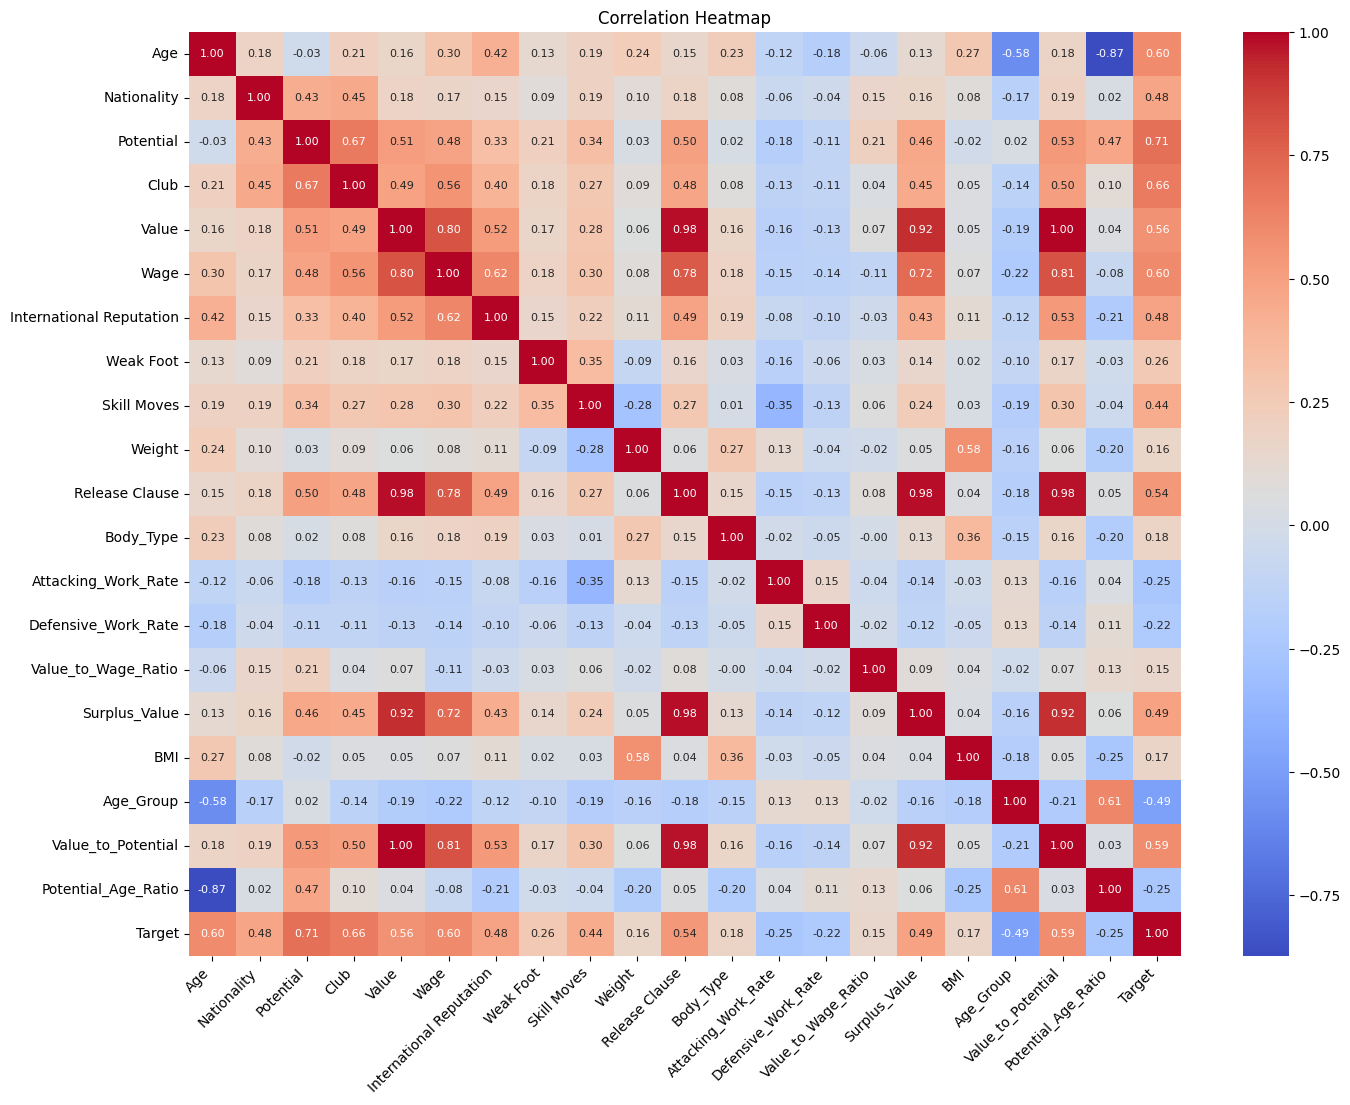

In [98]:
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", 
            cmap="coolwarm", cbar=True, annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Heatmap")
plt.show()

### Removing Highly Correlated Features

Based on the correlation heatmap, we identified features with strong correlations among themselves. High correlations between features can lead to redundancy and multicollinearity, which may negatively impact the model's interpretability and performance. To simplify the dataset and avoid redundancy, we decided to remove the following features:

#### Features to be removed:
1. **`Value`**, **`Release Clause`**, **`Surplus_Value`**, **`Wage`**:
   - Strongly correlated with `Value_to_Potential`.
   - We retained `Value_to_Potential` because it has a stronger correlation with the target.

2. **`Weight`**:
   - Strong correlation with `BMI` (r > 0.80).
   - We kept `BMI` as the primary physical attribute because it has a stronger correlation with         the target.
   - 
3. **`Potential_Age_Ratio`**:
   - Strong negative correlation with `Age` (r > -0.80).
   - We kept `Age` because it has a nice positive correlation with the target.

In [100]:
# Columns to drop based on high correlation with other features
drop = ['Value', 'Release Clause','Surplus_Value', 
        'Wage', 'Potential_Age_Ratio']

X_train = X_train.drop(columns=drop, errors='ignore')
X_test = X_test.drop(columns=drop, errors='ignore')
data = data.drop(columns=drop, errors='ignore')

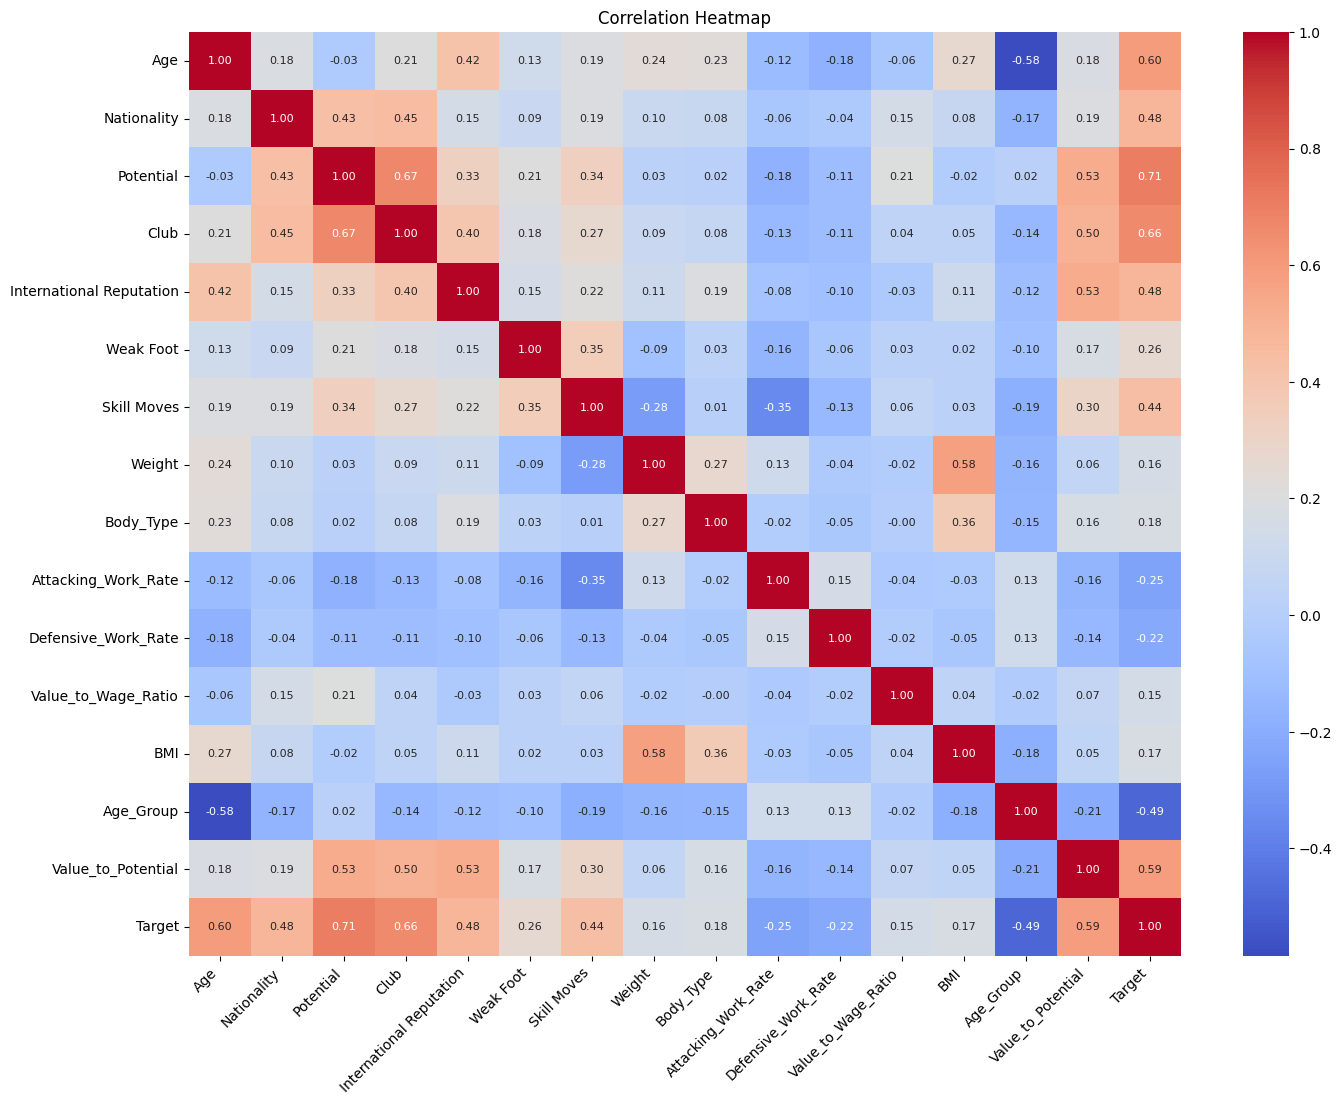

In [101]:
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", 
            cmap="coolwarm", cbar=True, annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Heatmap")
plt.show()

We can also consider removing the `Weight` feature, as it shows a low correlation with the target variable and has some correlation with `BMI`. Additionally, it is slightly less predictive compared to other physical features.

In [103]:
# Columns to drop based on high correlation with other features
drop = ['Weight']

X_train = X_train.drop(columns=drop, errors='ignore')
X_test = X_test.drop(columns=drop, errors='ignore')
data = data.drop(columns=drop, errors='ignore')

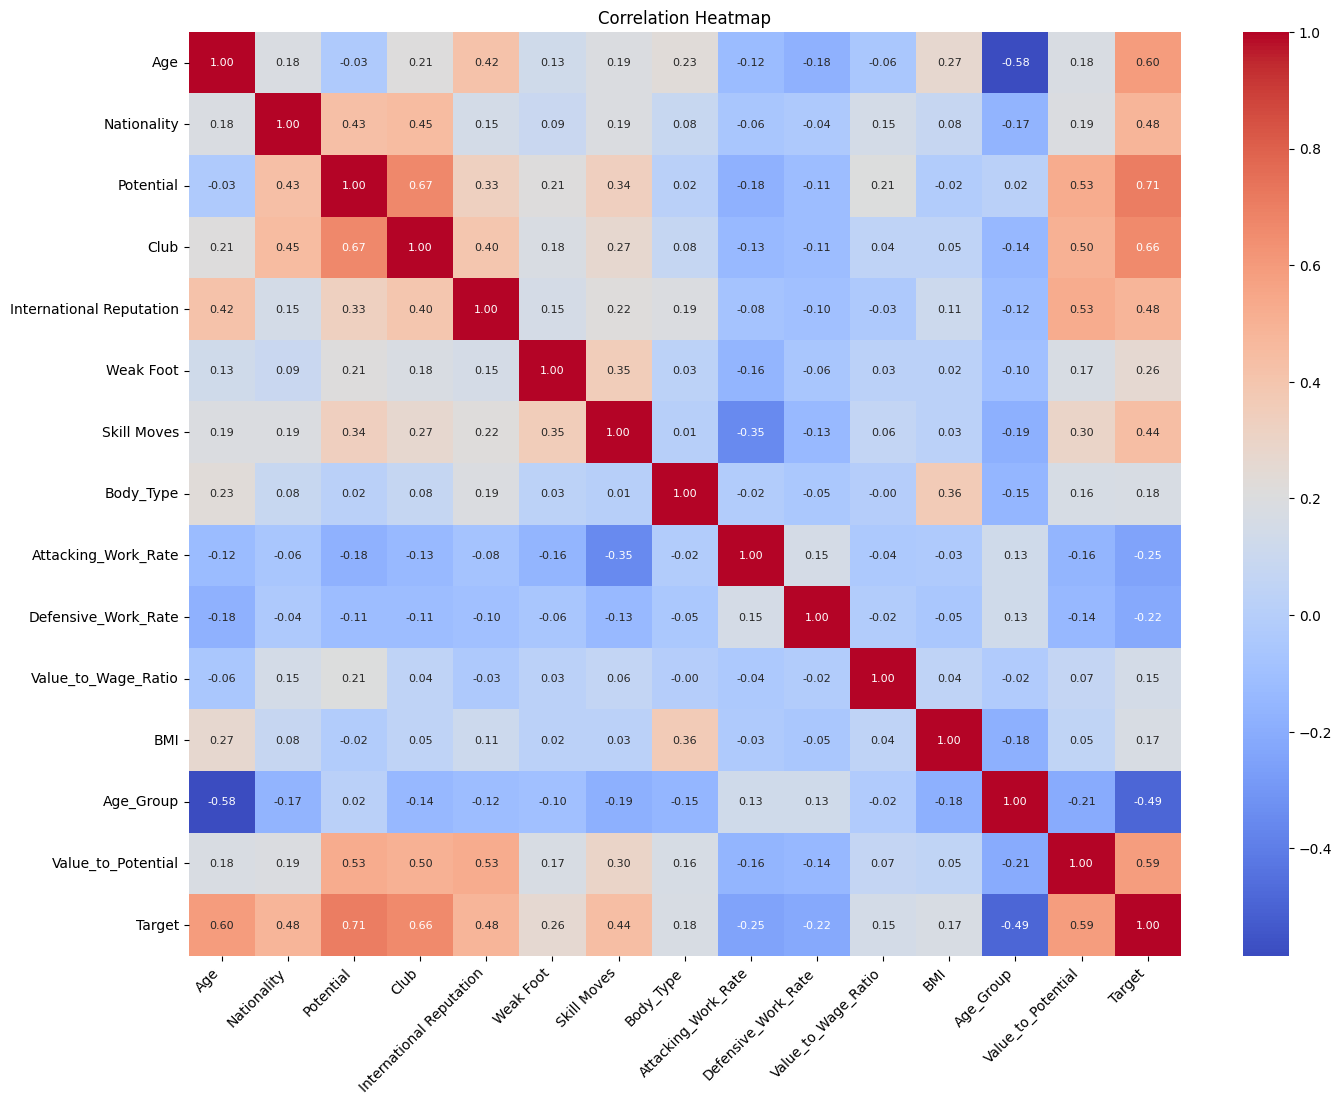

In [104]:
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", 
            cmap="coolwarm", cbar=True, annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Heatmap")
plt.show()

## Reviewing the Data

In [108]:
X_train.columns

Index(['Name', 'Age', 'Nationality', 'Potential', 'Club',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Body_Type',
       'Attacking_Work_Rate', 'Defensive_Work_Rate', 'CB', 'CDM', 'CF', 'CM',
       'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RES', 'RF', 'RM', 'RS', 'RW', 'RWB',
       'ST', 'SUB', 'Value_to_Wage_Ratio', 'BMI', 'Age_Group',
       'Value_to_Potential'],
      dtype='object')

In [113]:
X_test.columns

Index(['Name', 'Age', 'Nationality', 'Potential', 'Club',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Body_Type',
       'Attacking_Work_Rate', 'Defensive_Work_Rate', 'CB', 'CDM', 'CF', 'CM',
       'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RES', 'RF', 'RM', 'RS', 'RW', 'RWB',
       'ST', 'SUB', 'Value_to_Wage_Ratio', 'BMI', 'Age_Group',
       'Value_to_Potential'],
      dtype='object')

In [115]:
print(X_train.shape, X_test.shape)

(14100, 43) (3525, 43)


## And exporting it

In [118]:
X_train.to_csv("X_train_fe.csv", index=False)
X_test.to_csv("X_test_fe.csv", index=False)

print("Datasets successfully exported as CSV files.")

Datasets successfully exported as CSV files.
